In [ ]:
import tensorflow as tf
print(tf.__version__)
import zipfile,os
import random
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16

2.5.0


In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [ ]:
! kaggle datasets download techsash/waste-classification-data
! ls

 97% 413M/427M [00:03<00:00, 141MB/s]
100% 427M/427M [00:03<00:00, 124MB/s]
sample_data  waste-classification-data.zip


In [ ]:
import zipfile,os
local_zip = 'waste-classification-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/DATASET'
train = os.path.join(base_dir, 'TRAIN')
test = os.path.join(base_dir, 'TEST')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
 
val_generator = val_datagen.flow_from_directory(
        test, 
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
vgg_model=VGG16(include_top=False, input_shape=(150,150,3))
for layer in vgg_model.layers:
        layer.trainable=False

In [ ]:
model = tf.keras.models.Sequential([
    vgg_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_2 (ModuleWrap (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 18,910,530
Trainable params: 4,195,842
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

iterate_model = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=15, 
      validation_data=val_generator, 
      validation_steps=50,  
      verbose=1,
      callbacks=[callbacks])

Epoch 1/15
100/100 [==============================] - 675s 7s/step - loss: 0.4452 - accuracy: 0.8075 - val_loss: 0.3791 - val_accuracy: 0.8640
Epoch 2/15
100/100 [==============================] - 669s 7s/step - loss: 0.3747 - accuracy: 0.8370 - val_loss: 0.3632 - val_accuracy: 0.8680
Epoch 3/15
100/100 [==============================] - 667s 7s/step - loss: 0.3383 - accuracy: 0.8685 - val_loss: 0.3773 - val_accuracy: 0.8540
Epoch 4/15
100/100 [==============================] - 667s 7s/step - loss: 0.3542 - accuracy: 0.8555 - val_loss: 0.3815 - val_accuracy: 0.8670
Epoch 5/15
100/100 [==============================] - 666s 7s/step - loss: 0.3217 - accuracy: 0.8750 - val_loss: 0.4828 - val_accuracy: 0.8330
Epoch 6/15
100/100 [==============================] - 664s 7s/step - loss: 0.2943 - accuracy: 0.8805 - val_loss: 0.4038 - val_accuracy: 0.8670
Epoch 7/15
100/100 [==============================] - 669s 7s/step - loss: 0.3133 - accuracy: 0.8715 - val_loss: 0.4453 - val_accuracy: 0.8450

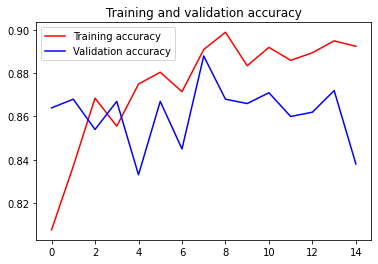

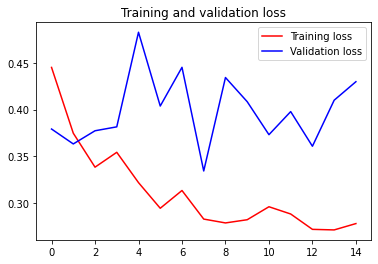

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = iterate_model.history['accuracy']
val_acc = iterate_model.history['val_accuracy']
loss = iterate_model.history['loss']
val_loss = iterate_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(val_generator)

126/126 [==============================] - 555s 4s/step - loss: 0.3986 - accuracy: 0.8404


[0.3985889256000519, 0.8404297828674316]

Saving rec1.jpg to rec1.jpg
Saving rec.jpg to rec.jpg
Saving rec3.jpg to rec3.jpg
Saving rec2.jpg to rec2.jpg
Saving organik5.jpg to organik5.jpg
Saving organik4.jpg to organik4.jpg
Saving organik3.jpg to organik3.jpg
Saving organik2.jpg to organik2.jpg
Saving organik1.jpg to organik1.jpg
rec1.jpg
[[0. 1.]]
rec.jpg
[[0. 1.]]
rec3.jpg
[[0. 1.]]
rec2.jpg
[[0. 1.]]
organik5.jpg
[[1. 0.]]
organik4.jpg
[[1. 0.]]
organik3.jpg
[[1. 0.]]
organik2.jpg
[[1. 0.]]
organik1.jpg
[[1. 0.]]


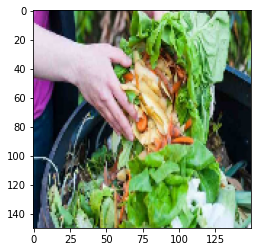

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  print(classes)

Saving O_13153.jpg to O_13153.jpg
Saving O_12937.jpg to O_12937.jpg
Saving O_12875.jpg to O_12875.jpg
O_13153.jpg
[[1. 0.]]
O_12937.jpg
[[1. 0.]]
O_12875.jpg
[[1. 0.]]


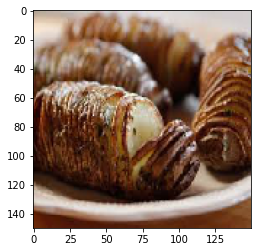

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  print(classes)

Saving O_12579.jpg to O_12579.jpg
Saving O_12708.jpg to O_12708.jpg
Saving R_10014.jpg to R_10014.jpg
Saving R_10026.jpg to R_10026.jpg
Saving R_10022.jpg to R_10022.jpg
Saving R_10023.jpg to R_10023.jpg
O_12579.jpg
[[1. 0.]]
O_12708.jpg
[[1. 0.]]
R_10014.jpg
[[0. 1.]]
R_10026.jpg
[[0. 1.]]
R_10022.jpg
[[0. 1.]]
R_10023.jpg
[[0. 1.]]


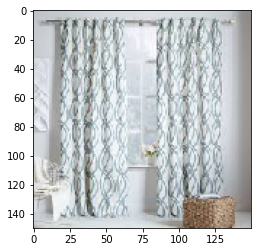

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(fn)
  print(classes)

In [ ]:
model.save('waste_model_with_vgg16.h5')

NotImplementedError: ignored